In [9]:
!pip install gdown
!pip install cv2


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!gdown --id 1IQ90jtnITrrcBWsFjF8jkFXF7LAxDqLF

C:\Users\temic\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1IQ90jtnITrrcBWsFjF8jkFXF7LAxDqLF

but Gdown can't. Please check connections and permissions.


In [5]:
import matplotlib.pyplot as plt
def show_images(images, figsize=(20,10), columns = 5):
    plt.figure(figsize=figsize)
    for i, image in enumerate(images):
        plt.subplot(len(images) // columns + 1, columns, i + 1)
        plt.imshow(image)
        

In [6]:
import os
IMAGE_PATH="./images"
file_names=os.listdir(IMAGE_PATH)
print(f"number of images: {len(file_names)}")

number of images: 5762


2232 3968
(4096,)


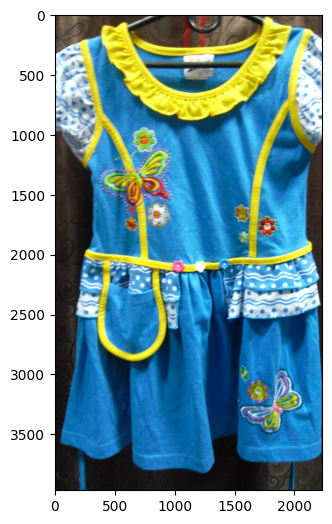

In [7]:
import numpy as np
import cv2
from PIL import Image
query_image_pillow=Image.open(f'{IMAGE_PATH}/0a3e62e3-fac5-4648-9da2-f6bc4074ee31.jpg')
width, height = query_image_pillow.size
print(width, height)
query_image=cv2.imread(f'{IMAGE_PATH}/0a3e62e3-fac5-4648-9da2-f6bc4074ee31.jpg')
query_hist_combined=cv2.calcHist([query_image],[0,1,2],None,[16,16,16],[0,256,0,256,0,256])
query_hist_combined = cv2.normalize(query_hist_combined, query_hist_combined).flatten()
print(query_hist_combined.shape)
show_images([np.array(query_image_pillow)])

In [9]:
file_names=os.listdir(IMAGE_PATH)
hists=[]
for file_name in file_names:
    img=cv2.imread(f'{IMAGE_PATH}/{file_name}')
    hist_combined=cv2.calcHist([img],[0,1,2],None,[16,16,16],[0,256,0,256,0,256])
    hist_combined = cv2.normalize(hist_combined, hist_combined).flatten()
    hists.append({"hist":hist_combined,"file_name":file_name})

In [10]:
%%time
found_images=[]
for hist in hists:
    similarity=cv2.compareHist(query_hist_combined,hist["hist"],cv2.HISTCMP_INTERSECT)
    found_images.append({"similarity":similarity,"file_name":hist["file_name"]})
found_images.sort(key=lambda item: item["similarity"],reverse=True)
found_images=found_images[:10]

CPU times: total: 15.6 ms
Wall time: 16.5 ms


In [11]:
print(found_images)
images_np=[]
found_images_filenames=list(map(lambda el: el["file_name"],found_images))
for image_filename in found_images_filenames:
    images_np.append(np.array(Image.open(f'{IMAGE_PATH}/{image_filename}')))

[{'similarity': 9.536633190687098, 'file_name': '0a3e62e3-fac5-4648-9da2-f6bc4074ee31.jpg'}, {'similarity': 2.996807973559271, 'file_name': 'c3aff407-9443-4b64-a13e-c1c33288700e.jpg'}, {'similarity': 2.916995972514542, 'file_name': '1b2ace0a-382e-4b87-8e9d-35cbcfac636b.jpg'}, {'similarity': 2.542952162235565, 'file_name': 'a18f1511-770a-4900-b748-691c6021a3b4.jpg'}, {'similarity': 2.4902496620475176, 'file_name': '2bd016a4-6026-4e31-81f6-3ee12d3e59a5.jpg'}, {'similarity': 2.328485813428074, 'file_name': 'fa812694-c800-480f-ac4b-40438d3a97eb.jpg'}, {'similarity': 2.2877291103779953, 'file_name': '6a2b8fc1-5485-467f-984d-ad532e852b52.jpg'}, {'similarity': 2.1746405027395213, 'file_name': 'c1480bd3-e7cb-421e-a58b-1b3cb7e4ff27.jpg'}, {'similarity': 2.131050767230363, 'file_name': '6a63e11b-d7b3-4063-941f-a2ca9dbcb8fd.jpg'}, {'similarity': 2.0855089772303472, 'file_name': '7e72662d-d284-4e75-800e-051cf95f4750.jpg'}]


C:\Users\temic\AppData\Local\Temp\ipykernel_16860\3924628367.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  show_images(np.array(images_np))


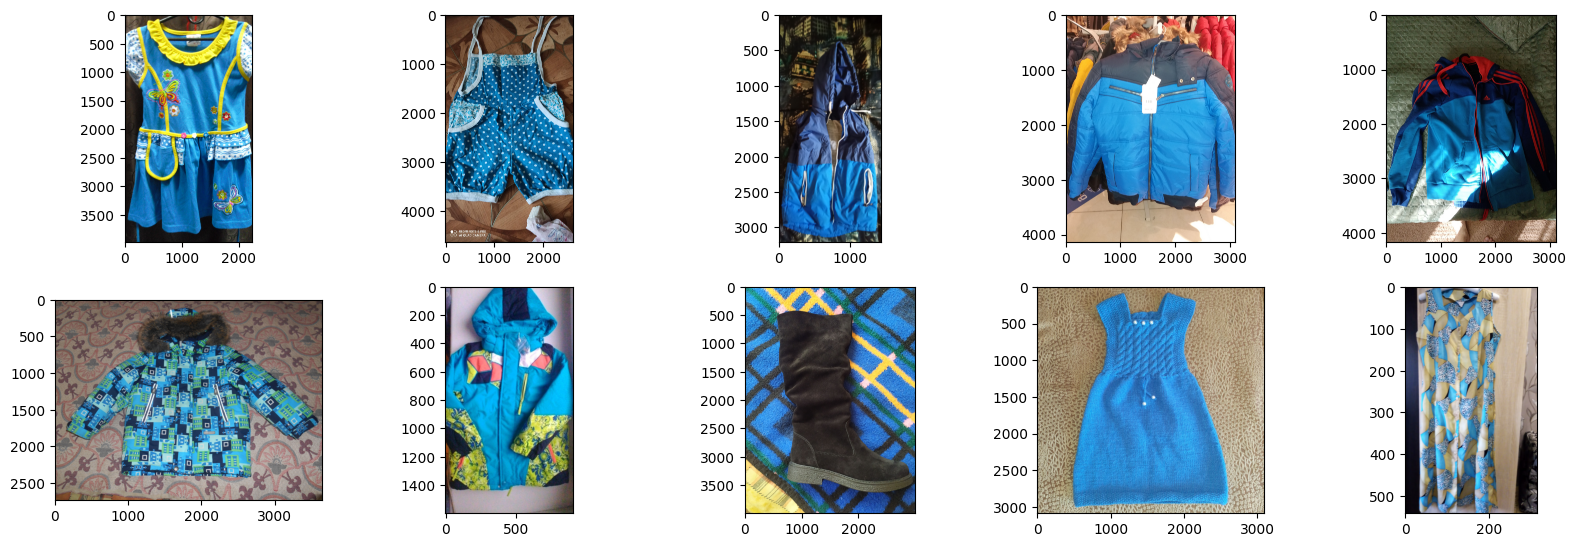

In [12]:
show_images(np.array(images_np))

In [13]:
from sklearn.neighbors import NearestNeighbors
hists_list=list(map(lambda el: el['hist'],hists))
knn = NearestNeighbors(n_neighbors=10,algorithm='brute',metric='euclidean')
knn.fit(hists_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=10)

In [ ]:
%%time
distances,indices= knn.kneighbors([query_hist_combined], return_distance=True)

In [ ]:
indices=indices[0]
images_np_knn=[]
for idx in indices:
    images_np_knn.append(np.array(Image.open(f'{IMAGE_PATH}/{file_names[idx]}')))
show_images(np.array(images_np_knn))